### EnergyHint Better Life survey analysis

This file contains an analysis of Better Life survey data from company EnergyHint. The data will help to guide the decision-making process of what targeted program should be recommended to the company.

### Imports

In [1]:
#for data manipulation
import pandas as pd
import numpy as np
from itertools import combinations

#for data vizualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#for statistical testing
from scipy import stats

#setting higher max columns limit
pd.set_option('display.max_columns', 500)

In [2]:
#loading the data
ehs = pd.read_csv('data-analyst-assignment--dataset.csv', sep=';')

### Data preprocessing

In [3]:
ehs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 25 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                      --------------  ----- 
 0   ID                                                                                                                                          1253 non-null   object
 1   Select your department                                                                                                                      1253 non-null   object
 2   Life enjoyment                                                                                                                              1253 non-null   int64 
 3   Work performance                                

In [4]:
#num of numeric columns
len(ehs._get_numeric_data().columns)

16

There's a total of 1253 observations/respondents. There are no missing values in the dataset. There is 25 features/columns in total, 16 of them are numerical and 9 are categorical/object type.


Numerical columns are tracked on scale from 1 to 5, where 1 = Strongly disagree, 2 = Disagree, 3 = Neutral, 4 = Agree, 5 = Strongly agree. Categorical variables have their own scale assigned.

In [5]:
ehs.columns

Index(['ID', 'Select your department', 'Life enjoyment', 'Work performance',
       'GH1: I am satisfied with my overall health',
       'GH2: I am able to manage any health concerns or conditions that I may have',
       'GH3:I have a strong desire to keep myself physically healthy',
       'PA1: My daily life involves a lot of physical activity and exercise',
       'PA2: My average amount of moderate (e.g. brisk walking, slow running) to intense (e.g. games, fast running) endurance exercise per week is',
       'PA3: I do some form of resistance or strength training (includes exercise with bodyweight, machines or weights)',
       'NU1: My diet is made up of healthy good quality foods and drinks',
       'NU2: My daily intake of vegetables and fruit is typically (1 portion = 1 fistful)',
       'NU3: I am able to maintain stable energy levels throughout the day',
       'RE1: I get sufficient amounts of sleep and general recovery each day',
       'RE2: My average amount of sleep du

#### Renaming columns

For easier data manipulation, it's better to rename the columns, as some of the names are too long.

In [6]:
rename_dict = {'ID': 'id',
       'Select your department': 'department',
       'Life enjoyment':'life_enj',
       'Work performance': 'work_perf',
       'GH1: I am satisfied with my overall health': 'gh1_health_sat',
       'GH2: I am able to manage any health concerns or conditions that I may have': 'gh2_able_managing_concerns',
       'GH3:I have a strong desire to keep myself physically healthy': 'gh3_desire_being_healthy',    
       'PA1: My daily life involves a lot of physical activity and exercise': 'pa1_lot_ph_activity',      
       'PA2: My average amount of moderate (e.g. brisk walking, slow running) to intense (e.g. games, fast running) endurance exercise per week is'
               : 'pa2_avg_exercise_weekly',
       'PA3: I do some form of resistance or strength training (includes exercise with bodyweight, machines or weights)'
               : 'pa3_strength_training',
       'NU1: My diet is made up of healthy good quality foods and drinks': 'nu1_healthy_diet',
       'NU2: My daily intake of vegetables and fruit is typically (1 portion = 1 fistful)': 'nu2_daily_veg_fruit', 
       'NU3: I am able to maintain stable energy levels throughout the day': 'nu3_stable_energy_levels',
       'RE1: I get sufficient amounts of sleep and general recovery each day': 're1_enough_sleep_rec', 
       'RE2: My average amount of sleep during workdays is': 're2_avg_sleep',
       'RE3: I am able to relax during my breaks at work': 're3_can_relax',
       'BM1: I am able to do daily activities and exercise without pain, discomfort or limitation': 'bm1_without_pain',
       'BM2: During a typical weekday, I sit on average (at work, at home, while commuting, etc.)': 'bm2_avg_sitting', 
       'BM3: I do exercises that develop my mobility and flexibility': 'bm3_mobility_exercise',       
       'ME1: My general energy level is good': 'me1_good_energy_level',
       'ME2: I am able to focus on my work and avoid distractions or switching between tasks': 'me2_able_to_focus',
       'ME3: I take part in activities and hobbies in my free time that help recharge my energy levels': 'me3_hobbies',
       'CO1: I feel like I have found a really significant meaning in my life': 'co1_meaning_in_life',
       'CO2: I have a system of values and beliefs that guide my daily activities': 'co2_value_system',
       'CO3: I am able to manage and balance my different roles and responsibilities well': 'co3_balancing_roles'
}

ehs.rename(columns=rename_dict, errors='raise', inplace=True)
ehs.head()

,id,department,life_enj,work_perf,gh1_health_sat,gh2_able_managing_concerns,gh3_desire_being_healthy,pa1_lot_ph_activity,pa2_avg_exercise_weekly,pa3_strength_training,nu1_healthy_diet,nu2_daily_veg_fruit,nu3_stable_energy_levels,re1_enough_sleep_rec,re2_avg_sleep,re3_can_relax,bm1_without_pain,bm2_avg_sitting,bm3_mobility_exercise,me1_good_energy_level,me2_able_to_focus,me3_hobbies,co1_meaning_in_life,co2_value_system,co3_balancing_roles
0,c5cbc89283,R & D,8,7,4,4,5,4,120-150 minutes,2 days/week,4,4-5 portions,5,5,≥ 8 hours,3,4,8-10 hours,Once per week,4,4,2-3 d/week,4,4,3
1,de1c56c4c8,Operations,8,8,4,4,4,4,120-150 minutes,2 days/week,4,2-3 portions,4,4,7-8 hours,3,4,10-12 hours,None,4,3,4-5 d/week,4,4,4
2,ebc7ffac7b,Operations,7,5,3,3,4,2,70-120 minutes,Never,2,2-3 portions,1,2,6-7 hours,2,3,10-12 hours,None,2,2,Rarely,3,2,2
3,26f136952a,Sales & Marketing,7,4,4,3,3,3,120-150 minutes,1-2 days/month,3,2-3 portions,2,2,6-7 hours,4,4,8-10 hours,Once per week,2,3,2-3 d/week,3,2,3
4,b6df87701c,R & D,8,6,4,4,4,1,30-70 minutes,1-2 days/month,3,≥ 8 portions,1,2,7-8 hours,1,2,12-14 hours,None,2,1,Rarely,3,3,2


In [7]:
#checking object types columns
ehs.loc[:,ehs.dtypes==np.object]

,id,department,pa2_avg_exercise_weekly,pa3_strength_training,nu2_daily_veg_fruit,re2_avg_sleep,bm2_avg_sitting,bm3_mobility_exercise,me3_hobbies
0,c5cbc89283,R & D,120-150 minutes,2 days/week,4-5 portions,≥ 8 hours,8-10 hours,Once per week,2-3 d/week
1,de1c56c4c8,Operations,120-150 minutes,2 days/week,2-3 portions,7-8 hours,10-12 hours,None,4-5 d/week
2,ebc7ffac7b,Operations,70-120 minutes,Never,2-3 portions,6-7 hours,10-12 hours,None,Rarely
3,26f136952a,Sales & Marketing,120-150 minutes,1-2 days/month,2-3 portions,6-7 hours,8-10 hours,Once per week,2-3 d/week
4,b6df87701c,R & D,30-70 minutes,1-2 days/month,≥ 8 portions,7-8 hours,12-14 hours,None,Rarely
...,...,...,...,...,...,...,...,...,...
1248,n5yhttfw9k,Operations,120-150 minutes,3 or more days/week,4-5 portions,6-7 hours,8-10 hours,Once per week,Once per week
1249,8sfztlfyq7,R & D,120-150 minutes,2 days/week,< 2 portions,6-7 hours,> 14 hours,Twice per week,2-3 d/week
1250,mo0wwkt0un,Operations,120-150 minutes,2 days/week,6-7 portions,5-6 hours,< 8 hours,Once per week,2-3 d/week
1251,75vqyfqdht,Operations,70-120 minutes,1-2 days/month,2-3 portions,6-7 hours,8-10 hours,Twice per month,Once per week


ID and departments are going to stay as they are, but possibly, we could change the rest into some ordinal variable.

In [8]:
#checking the scales of categorical variables
for col in ehs.loc[:,ehs.dtypes==np.object].iloc[:,2:]:
    print(ehs[col].value_counts())

> 150 minutes      328
30-70 minutes      289
70-120 minutes     250
120-150 minutes    234
< 30 minutes       152
Name: pa2_avg_exercise_weekly, dtype: int64
Never                  302
1-2 days/month         259
1 day/week             252
2 days/week            237
3 or more days/week    203
Name: pa3_strength_training, dtype: int64
2-3 portions    525
4-5 portions    339
< 2 portions    242
6-7 portions    116
≥ 8 portions     31
Name: nu2_daily_veg_fruit, dtype: int64
6-7 hours    543
7-8 hours    416
5-6 hours    208
≥ 8 hours     49
< 5 hours     37
Name: re2_avg_sleep, dtype: int64
8-10 hours     454
10-12 hours    351
12-14 hours    200
< 8 hours      149
> 14 hours      99
Name: bm2_avg_sitting, dtype: int64
Once per week         310
Twice per month       293
None                  289
Twice per week        206
≥ 3 times per week    155
Name: bm3_mobility_exercise, dtype: int64
2-3 d/week       461
Once per week    396
Rarely           187
4-5 d/week       161
6-7 d/week        

#### Creating numerical columns to categorical variables

As the categorical columns displayed above all have ordinal character, I will decode them into ordinal variables for easier manipulation (observation of correlation, or overall section score, for example). I will also keep the original columns for vizualisations purposes.

In [9]:
#pa2_avg_exercise_weekly
ehs['pa2_avg_exercise_weekly_num'] = 1
ehs.loc[ehs['pa2_avg_exercise_weekly']=='30-70 minutes', 'pa2_avg_exercise_weekly_num'] = 2
ehs.loc[ehs['pa2_avg_exercise_weekly']=='70-120 minutes', 'pa2_avg_exercise_weekly_num'] = 3
ehs.loc[ehs['pa2_avg_exercise_weekly']=='120-150 minutes', 'pa2_avg_exercise_weekly_num'] = 4
ehs.loc[ehs['pa2_avg_exercise_weekly']=='> 150 minutes', 'pa2_avg_exercise_weekly_num'] = 5

#pa3_strength_training
ehs['pa3_strength_training_num'] = 1
ehs.loc[ehs['pa3_strength_training']=='1-2 days/month', 'pa3_strength_training_num'] = 2
ehs.loc[ehs['pa3_strength_training']=='1 day/week', 'pa3_strength_training_num'] = 3
ehs.loc[ehs['pa3_strength_training']=='2 days/week', 'pa3_strength_training_num'] = 4
ehs.loc[ehs['pa3_strength_training']=='3 or more days/week', 'pa3_strength_training_num'] = 5

#nu2_daily_veg_fruit
ehs['nu2_daily_veg_fruit_num'] = 1
ehs.loc[ehs['nu2_daily_veg_fruit']=='2-3 portions', 'nu2_daily_veg_fruit_num'] = 2
ehs.loc[ehs['nu2_daily_veg_fruit']=='4-5 portions', 'nu2_daily_veg_fruit_num'] = 3
ehs.loc[ehs['nu2_daily_veg_fruit']=='6-7 portions', 'nu2_daily_veg_fruit_num'] = 4
ehs.loc[ehs['nu2_daily_veg_fruit']=='≥ 8 portions', 'nu2_daily_veg_fruit_num'] = 5

#re2_avg_sleep
ehs['re2_avg_sleep_num'] = 1
ehs.loc[ehs['re2_avg_sleep']=='5-6 hours', 're2_avg_sleep_num'] = 2
ehs.loc[ehs['re2_avg_sleep']=='6-7 hours', 're2_avg_sleep_num'] = 3
ehs.loc[ehs['re2_avg_sleep']=='7-8 hours', 're2_avg_sleep_num'] = 4
ehs.loc[ehs['re2_avg_sleep']=='≥ 8 hours', 're2_avg_sleep_num'] = 5

#bm2_avg_sitting
ehs['bm2_avg_sitting_num'] = 1
ehs.loc[ehs['bm2_avg_sitting']=='12-14 hours', 'bm2_avg_sitting_num'] = 2
ehs.loc[ehs['bm2_avg_sitting']=='10-12 hours', 'bm2_avg_sitting_num'] = 3
ehs.loc[ehs['bm2_avg_sitting']=='8-10 hours', 'bm2_avg_sitting_num'] = 4
ehs.loc[ehs['bm2_avg_sitting']=='< 8 hours', 'bm2_avg_sitting_num'] = 5

#bm3_mobility_exercise
ehs['bm3_mobility_exercise_num'] = 1
ehs.loc[ehs['bm3_mobility_exercise']=='Twice per month', 'bm3_mobility_exercise_num'] = 2
ehs.loc[ehs['bm3_mobility_exercise']=='Once per week', 'bm3_mobility_exercise_num'] = 3
ehs.loc[ehs['bm3_mobility_exercise']=='Twice per week', 'bm3_mobility_exercise_num'] = 4
ehs.loc[ehs['bm3_mobility_exercise']=='≥ 3 times per week', 'bm3_mobility_exercise_num'] = 5

#me3_hobbies
ehs['me3_hobbies_num'] = 1
ehs.loc[ehs['me3_hobbies']=='Once per week', 'me3_hobbies_num'] = 2
ehs.loc[ehs['me3_hobbies']=='2-3 d/week', 'me3_hobbies_num'] = 3
ehs.loc[ehs['me3_hobbies']=='4-5 d/week', 'me3_hobbies_num'] = 4
ehs.loc[ehs['me3_hobbies']=='6-7 d/week', 'me3_hobbies_num'] = 5


ehs.head()

,id,department,life_enj,work_perf,gh1_health_sat,gh2_able_managing_concerns,gh3_desire_being_healthy,pa1_lot_ph_activity,pa2_avg_exercise_weekly,pa3_strength_training,nu1_healthy_diet,nu2_daily_veg_fruit,nu3_stable_energy_levels,re1_enough_sleep_rec,re2_avg_sleep,re3_can_relax,bm1_without_pain,bm2_avg_sitting,bm3_mobility_exercise,me1_good_energy_level,me2_able_to_focus,me3_hobbies,co1_meaning_in_life,co2_value_system,co3_balancing_roles,pa2_avg_exercise_weekly_num,pa3_strength_training_num,nu2_daily_veg_fruit_num,re2_avg_sleep_num,bm2_avg_sitting_num,bm3_mobility_exercise_num,me3_hobbies_num
0,c5cbc89283,R & D,8,7,4,4,5,4,120-150 minutes,2 days/week,4,4-5 portions,5,5,≥ 8 hours,3,4,8-10 hours,Once per week,4,4,2-3 d/week,4,4,3,4,4,3,5,4,3,3
1,de1c56c4c8,Operations,8,8,4,4,4,4,120-150 minutes,2 days/week,4,2-3 portions,4,4,7-8 hours,3,4,10-12 hours,None,4,3,4-5 d/week,4,4,4,4,4,2,4,3,1,4
2,ebc7ffac7b,Operations,7,5,3,3,4,2,70-120 minutes,Never,2,2-3 portions,1,2,6-7 hours,2,3,10-12 hours,None,2,2,Rarely,3,2,2,3,1,2,3,3,1,1
3,26f136952a,Sales & Marketing,7,4,4,3,3,3,120-150 minutes,1-2 days/month,3,2-3 portions,2,2,6-7 hours,4,4,8-10 hours,Once per week,2,3,2-3 d/week,3,2,3,4,2,2,3,4,3,3
4,b6df87701c,R & D,8,6,4,4,4,1,30-70 minutes,1-2 days/month,3,≥ 8 portions,1,2,7-8 hours,1,2,12-14 hours,None,2,1,Rarely,3,3,2,2,2,5,4,2,1,1


In [10]:
#checking data types
ehs.dtypes

id                             object
department                     object
life_enj                        int64
work_perf                       int64
gh1_health_sat                  int64
gh2_able_managing_concerns      int64
gh3_desire_being_healthy        int64
pa1_lot_ph_activity             int64
pa2_avg_exercise_weekly        object
pa3_strength_training          object
nu1_healthy_diet                int64
nu2_daily_veg_fruit            object
nu3_stable_energy_levels        int64
re1_enough_sleep_rec            int64
re2_avg_sleep                  object
re3_can_relax                   int64
bm1_without_pain                int64
bm2_avg_sitting                object
bm3_mobility_exercise          object
me1_good_energy_level           int64
me2_able_to_focus               int64
me3_hobbies                    object
co1_meaning_in_life             int64
co2_value_system                int64
co3_balancing_roles             int64
pa2_avg_exercise_weekly_num     int64
pa3_strength

#### Creating score for each component

As the aim of this analysis is to identify key components for customized coaching program, it is crucial to identify key components for progression of employees.

For this purpose, the summation score of all the questions within each component will be created. This score will act as an easy-to-understand indicator of how are employees doing in each component. In each section, the lowest possible score to be achieved is 3 and the highest is 15 points.

In [11]:
#GH
ehs['gh_score'] = ehs.gh1_health_sat + ehs.gh2_able_managing_concerns + ehs.gh3_desire_being_healthy

#PA
ehs['pa_score'] = ehs.pa1_lot_ph_activity + ehs.pa2_avg_exercise_weekly_num + ehs.pa3_strength_training_num

#NU
ehs['nu_score'] = ehs.nu1_healthy_diet + ehs.nu2_daily_veg_fruit_num + ehs.nu3_stable_energy_levels

#RE
ehs['re_score'] = ehs.re1_enough_sleep_rec + ehs.re2_avg_sleep_num + ehs.re3_can_relax

#BM
ehs['bm_score'] = ehs.bm1_without_pain + ehs.bm2_avg_sitting_num + ehs.bm3_mobility_exercise_num

#ME
ehs['me_score'] = ehs.me1_good_energy_level + ehs.me2_able_to_focus + ehs.me3_hobbies_num

#CO
ehs['co_score'] = ehs.co1_meaning_in_life + ehs.co2_value_system + ehs.co3_balancing_roles

ehs.head()

,id,department,life_enj,work_perf,gh1_health_sat,gh2_able_managing_concerns,gh3_desire_being_healthy,pa1_lot_ph_activity,pa2_avg_exercise_weekly,pa3_strength_training,nu1_healthy_diet,nu2_daily_veg_fruit,nu3_stable_energy_levels,re1_enough_sleep_rec,re2_avg_sleep,re3_can_relax,bm1_without_pain,bm2_avg_sitting,bm3_mobility_exercise,me1_good_energy_level,me2_able_to_focus,me3_hobbies,co1_meaning_in_life,co2_value_system,co3_balancing_roles,pa2_avg_exercise_weekly_num,pa3_strength_training_num,nu2_daily_veg_fruit_num,re2_avg_sleep_num,bm2_avg_sitting_num,bm3_mobility_exercise_num,me3_hobbies_num,gh_score,pa_score,nu_score,re_score,bm_score,me_score,co_score
0,c5cbc89283,R & D,8,7,4,4,5,4,120-150 minutes,2 days/week,4,4-5 portions,5,5,≥ 8 hours,3,4,8-10 hours,Once per week,4,4,2-3 d/week,4,4,3,4,4,3,5,4,3,3,13,12,12,13,11,11,11
1,de1c56c4c8,Operations,8,8,4,4,4,4,120-150 minutes,2 days/week,4,2-3 portions,4,4,7-8 hours,3,4,10-12 hours,None,4,3,4-5 d/week,4,4,4,4,4,2,4,3,1,4,12,12,10,11,8,11,12
2,ebc7ffac7b,Operations,7,5,3,3,4,2,70-120 minutes,Never,2,2-3 portions,1,2,6-7 hours,2,3,10-12 hours,None,2,2,Rarely,3,2,2,3,1,2,3,3,1,1,10,6,5,7,7,5,7
3,26f136952a,Sales & Marketing,7,4,4,3,3,3,120-150 minutes,1-2 days/month,3,2-3 portions,2,2,6-7 hours,4,4,8-10 hours,Once per week,2,3,2-3 d/week,3,2,3,4,2,2,3,4,3,3,10,9,7,9,11,8,8
4,b6df87701c,R & D,8,6,4,4,4,1,30-70 minutes,1-2 days/month,3,≥ 8 portions,1,2,7-8 hours,1,2,12-14 hours,None,2,1,Rarely,3,3,2,2,2,5,4,2,1,1,12,5,9,7,5,4,8


### Data exploration

In [12]:
#description of all columns
ehs.describe(include='all')

,id,department,life_enj,work_perf,gh1_health_sat,gh2_able_managing_concerns,gh3_desire_being_healthy,pa1_lot_ph_activity,pa2_avg_exercise_weekly,pa3_strength_training,nu1_healthy_diet,nu2_daily_veg_fruit,nu3_stable_energy_levels,re1_enough_sleep_rec,re2_avg_sleep,re3_can_relax,bm1_without_pain,bm2_avg_sitting,bm3_mobility_exercise,me1_good_energy_level,me2_able_to_focus,me3_hobbies,co1_meaning_in_life,co2_value_system,co3_balancing_roles,pa2_avg_exercise_weekly_num,pa3_strength_training_num,nu2_daily_veg_fruit_num,re2_avg_sleep_num,bm2_avg_sitting_num,bm3_mobility_exercise_num,me3_hobbies_num,gh_score,pa_score,nu_score,re_score,bm_score,me_score,co_score
count,1253,1253,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253,1253,1253.000000,1253,1253.000000,1253.000000,1253,1253.000000,1253.000000,1253,1253,1253.000000,1253.000000,1253,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
unique,1253,6,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN,5,NaN,NaN,5,NaN,NaN,5,5,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3lvlsz0inc,Operations,NaN,NaN,NaN,NaN,NaN,NaN,> 150 minutes,Never,NaN,2-3 portions,NaN,NaN,6-7 hours,NaN,NaN,8-10 hours,Once per week,NaN,NaN,2-3 d/week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,738,NaN,NaN,NaN,NaN,NaN,NaN,328,302,NaN,525,NaN,NaN,543,NaN,NaN,454,310,NaN,NaN,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.267358,7.165204,3.645650,3.839585,4.350359,2.860335,NaN,NaN,3.605746,NaN,3.383081,3.009577,NaN,2.964086,3.836393,NaN,NaN,3.545890,3.195531,NaN,3.464485,3.873105,3.543496,3.237031,2.824421,2.336792,3.185156,3.282522,2.716680,2.590583,11.835595,8.921788,9.325619,9.158819,9.835595,9.332003,10.881085
std,NaN,NaN,1.392998,1.353260,0.922157,0.885072,0.781777,1.172283,NaN,NaN,0.835150,NaN,0.915836,1.073157,NaN,1.045064,1.025030,NaN,NaN,0.874109,0.982716,NaN,0.914766,0.833994,0.822448,1.376608,1.406674,0.971591,0.859566,1.111222,1.317861,1.013869,2.022267,3.359258,2.031137,2.216947,2.244292,2.054739,1.939847
min,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
25%,NaN,NaN,7.000000,7.000000,3.000000,3.000000,4.000000,2.000000,NaN,NaN,3.000000,NaN,3.000000,2.000000,NaN,2.000000,3.000000,NaN,NaN,3.000000,2.000000,NaN,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,11.000000,6.000000,8.000000,8.000000,8.000000,8.000000,10.000000
50%,NaN,NaN,7.000000,7.000000,4.000000,4.000000,5.000000,3.000000,NaN,NaN,4.000000,NaN,4.000000,3.000000,NaN,3.000000,4.000000,NaN,NaN,4.000000,3.000000,NaN,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,12.000000,9.000000,9.000000,9.000000,10.000000,9.000000,11.000000
75%,NaN,NaN,8.000000,8.000000,4.000000,4.000000,5.000000,4.000000,NaN,NaN,4.000000,NaN,4.000000,4.000000,NaN,4.000000,5.000000,NaN,NaN,4.000000,4.000000,NaN,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,13.000000,12.000000,11.000000,11.000000,11.000000,11.000000,12.000000


In [13]:
#list of departments
ehs.department.value_counts()

Operations           738
R & D                406
Sales & Marketing     52
Finance               27
HR                    18
Management            12
Name: department, dtype: int64

#### Correlation matrix and heatmap

to observe and vizualise the correlations between variables.

In [14]:
ehs.corr()

,life_enj,work_perf,gh1_health_sat,gh2_able_managing_concerns,gh3_desire_being_healthy,pa1_lot_ph_activity,nu1_healthy_diet,nu3_stable_energy_levels,re1_enough_sleep_rec,re3_can_relax,bm1_without_pain,me1_good_energy_level,me2_able_to_focus,co1_meaning_in_life,co2_value_system,co3_balancing_roles,pa2_avg_exercise_weekly_num,pa3_strength_training_num,nu2_daily_veg_fruit_num,re2_avg_sleep_num,bm2_avg_sitting_num,bm3_mobility_exercise_num,me3_hobbies_num,gh_score,pa_score,nu_score,re_score,bm_score,me_score,co_score
life_enj,1.000000,0.438390,0.438798,0.368451,0.171352,0.232227,0.214946,0.266501,0.211470,0.228259,0.284059,0.459258,0.212673,0.496055,0.286357,0.320647,0.206425,0.161750,0.124034,0.130059,0.084290,0.150502,0.263629,0.427592,0.233364,0.267876,0.260394,0.259848,0.427170,0.492982
work_perf,0.438390,1.000000,0.232560,0.186192,0.109075,0.082022,0.125522,0.247926,0.128156,0.147085,0.158270,0.372050,0.325841,0.323802,0.235855,0.303917,0.075003,0.055950,0.062135,0.028615,0.037986,0.070604,0.115701,0.229704,0.082788,0.193123,0.142467,0.132554,0.371204,0.382948
gh1_health_sat,0.438798,0.232560,1.000000,0.644688,0.304189,0.439609,0.293453,0.351899,0.299638,0.236252,0.387310,0.429427,0.175232,0.245453,0.161659,0.299418,0.361306,0.306665,0.173423,0.190657,0.082965,0.200592,0.335071,0.855753,0.429887,0.362287,0.330337,0.335763,0.431825,0.312195
gh2_able_managing_concerns,0.368451,0.186192,0.644688,1.000000,0.255597,0.397937,0.247186,0.336996,0.335464,0.243325,0.385717,0.382739,0.235364,0.297300,0.214784,0.315179,0.310498,0.268618,0.134396,0.203903,0.142759,0.171914,0.277448,0.830452,0.378592,0.317875,0.356149,0.347801,0.412290,0.366167
gh3_desire_being_healthy,0.171352,0.109075,0.304189,0.255597,1.000000,0.383744,0.304707,0.225152,0.093104,0.059406,0.178238,0.229503,0.108291,0.111789,0.177272,0.117274,0.340613,0.356673,0.206260,0.066225,0.050543,0.300315,0.251657,0.637161,0.422852,0.325472,0.098750,0.282779,0.273600,0.178651
pa1_lot_ph_activity,0.232227,0.082022,0.439609,0.397937,0.383744,1.000000,0.245569,0.246278,0.250577,0.197358,0.231561,0.249064,0.095136,0.128322,0.030059,0.174062,0.648610,0.581366,0.231373,0.219884,0.217937,0.442772,0.432344,0.522974,0.858213,0.322694,0.299585,0.473666,0.364786,0.147233
nu1_healthy_diet,0.214946,0.125522,0.293453,0.247186,0.304707,0.245569,1.000000,0.334420,0.177106,0.116460,0.192370,0.256757,0.124173,0.185529,0.254938,0.145922,0.195286,0.174911,0.446278,0.171865,0.087413,0.227175,0.209175,0.359794,0.238967,0.775439,0.207267,0.264541,0.271828,0.258961
nu3_stable_energy_levels,0.266501,0.247926,0.351899,0.336996,0.225152,0.246278,0.334420,1.000000,0.346526,0.272252,0.269314,0.560697,0.333815,0.287014,0.227873,0.354303,0.176898,0.147110,0.230097,0.145216,0.093701,0.134335,0.250764,0.394998,0.220037,0.698469,0.352385,0.248280,0.521914,0.383531
re1_enough_sleep_rec,0.211470,0.128156,0.299638,0.335464,0.093104,0.250577,0.177106,0.346526,1.000000,0.259540,0.180772,0.311167,0.222403,0.156562,0.131652,0.347933,0.194721,0.116988,0.052825,0.598991,0.183928,0.143110,0.243655,0.319448,0.216228,0.254338,0.838660,0.257667,0.358969,0.277946
re3_can_relax,0.228259,0.147085,0.236252,0.243325,0.059406,0.197358,0.116460,0.272252,0.259540,1.000000,0.222669,0.331000,0.307822,0.182891,0.149640,0.330317,0.138613,0.110349,0.077999,0.136335,0.069269,0.141651,0.222059,0.237191,0.171883,0.207953,0.649894,0.219175,0.397603,0.290626


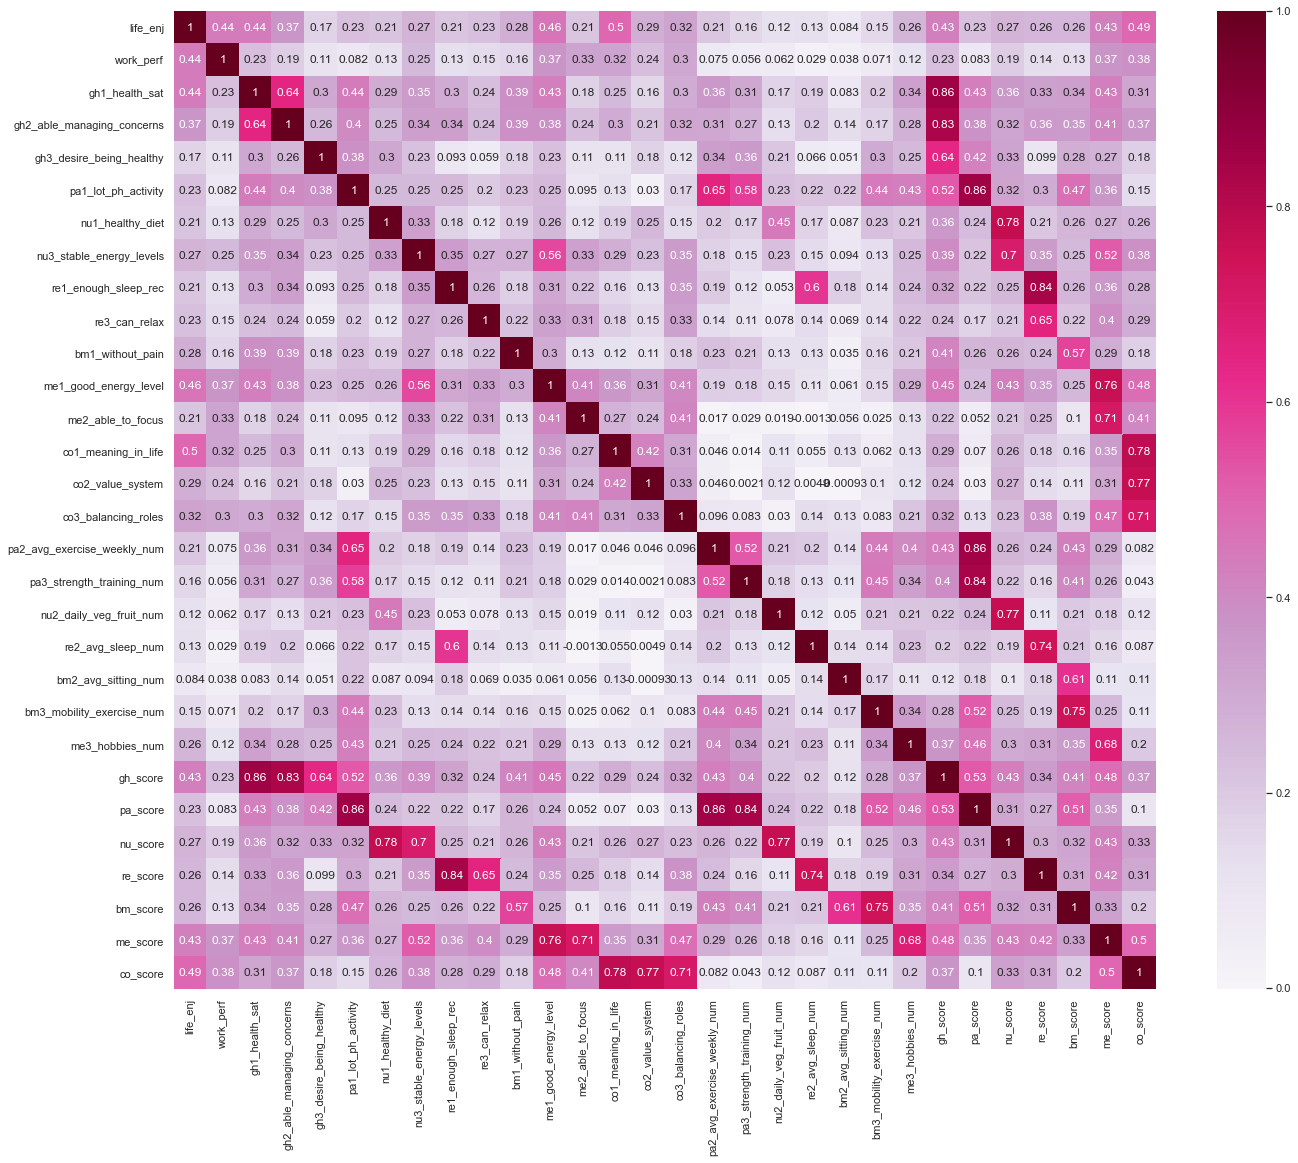

In [15]:
plt.figure(figsize=(22, 18))
sns.heatmap(ehs.corr(), annot=True, cmap='PuRd')

#### Statistical testing

In [16]:
#melting data
ehs_melted = pd.melt(ehs, id_vars=ehs.columns[:-7],
       var_name='score_type', value_name='score')
ehs_melted.head()

,id,department,life_enj,work_perf,gh1_health_sat,gh2_able_managing_concerns,gh3_desire_being_healthy,pa1_lot_ph_activity,pa2_avg_exercise_weekly,pa3_strength_training,nu1_healthy_diet,nu2_daily_veg_fruit,nu3_stable_energy_levels,re1_enough_sleep_rec,re2_avg_sleep,re3_can_relax,bm1_without_pain,bm2_avg_sitting,bm3_mobility_exercise,me1_good_energy_level,me2_able_to_focus,me3_hobbies,co1_meaning_in_life,co2_value_system,co3_balancing_roles,pa2_avg_exercise_weekly_num,pa3_strength_training_num,nu2_daily_veg_fruit_num,re2_avg_sleep_num,bm2_avg_sitting_num,bm3_mobility_exercise_num,me3_hobbies_num,score_type,score
0,c5cbc89283,R & D,8,7,4,4,5,4,120-150 minutes,2 days/week,4,4-5 portions,5,5,≥ 8 hours,3,4,8-10 hours,Once per week,4,4,2-3 d/week,4,4,3,4,4,3,5,4,3,3,gh_score,13
1,de1c56c4c8,Operations,8,8,4,4,4,4,120-150 minutes,2 days/week,4,2-3 portions,4,4,7-8 hours,3,4,10-12 hours,None,4,3,4-5 d/week,4,4,4,4,4,2,4,3,1,4,gh_score,12
2,ebc7ffac7b,Operations,7,5,3,3,4,2,70-120 minutes,Never,2,2-3 portions,1,2,6-7 hours,2,3,10-12 hours,None,2,2,Rarely,3,2,2,3,1,2,3,3,1,1,gh_score,10
3,26f136952a,Sales & Marketing,7,4,4,3,3,3,120-150 minutes,1-2 days/month,3,2-3 portions,2,2,6-7 hours,4,4,8-10 hours,Once per week,2,3,2-3 d/week,3,2,3,4,2,2,3,4,3,3,gh_score,10
4,b6df87701c,R & D,8,6,4,4,4,1,30-70 minutes,1-2 days/month,3,≥ 8 portions,1,2,7-8 hours,1,2,12-14 hours,None,2,1,Rarely,3,3,2,2,2,5,4,2,1,1,gh_score,12


##### Analysis of variance

###### between element scores

In [17]:
# anova

df_anova = ehs_melted[['score','score_type']]
types = pd.unique(df_anova.score_type.values)
d_data = {tp:df_anova['score'][df_anova.score_type == tp] for tp in types}
 
F, p = stats.f_oneway(d_data['gh_score'], d_data['pa_score'], d_data['nu_score'], 
                      d_data['re_score'], d_data['bm_score'], d_data['me_score'], d_data['co_score'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  2.53045063e-316
reject null hypothesis


In [18]:
#funtion to get all combinations of test statistics with significance
def ttest_run(c1, c2):
    results = stats.ttest_ind(d_data[c1],d_data[c2])
    df = pd.DataFrame({'categ1': c1,
                       'categ2': c2,
                       'tstat': results.statistic,
                       'pvalue': results.pvalue}, 
                       index = [0])    
    return df

df_list = [ttest_run(i, j) for i, j in combinations(ehs_melted['score_type'].unique().tolist(), 2)]

ttest_df = pd.concat(df_list, ignore_index = True)

In [19]:
ttest_df.reindex(ttest_df.tstat.abs().sort_values(ascending=False).index)

,categ1,categ2,tstat,pvalue
2,gh_score,re_score,31.576193,1.689826e-184
1,gh_score,nu_score,30.998396,7.550292e-179
4,gh_score,me_score,30.739644,2.473253e-176
0,gh_score,pa_score,26.305126,7.304316e-135
3,gh_score,bm_score,23.434492,5.692266e-110
17,re_score,co_score,-20.695202,5.836635e-88
14,nu_score,co_score,-19.603720,1.010084e-79
20,me_score,co_score,-19.405001,2.947446e-78
10,pa_score,co_score,-17.878953,2.228058e-67
19,bm_score,co_score,-12.475504,1.067866e-34


In [20]:
#pivot table of scores and department
table = pd.pivot_table(ehs_melted, values='score', index='department',
                    columns='score_type', aggfunc=np.mean)
table

score_type,bm_score,co_score,gh_score,me_score,nu_score,pa_score,re_score
department,,,,,,,
Finance,10.037037,11.481481,12.111111,9.296296,9.703704,9.148148,9.407407
HR,10.888889,11.333333,11.833333,10.333333,9.777778,8.722222,8.888889
Management,9.416667,11.166667,12.416667,8.916667,8.833333,7.833333,8.916667
Operations,9.907859,10.917344,11.925474,9.390244,9.378049,8.997290,9.210027
R & D,9.625616,10.738916,11.650246,9.123153,9.142857,8.738916,8.980296
Sales & Marketing,10.076923,10.942308,11.730769,9.903846,9.769231,9.480769,9.846154


###### between departments and life enjoyment

In [21]:
# anova departments and life enjoyment

df_anova_le = ehs_melted[['department','life_enj']]
deps = pd.unique(df_anova_le.department.values)
dep_data = {dep:df_anova_le['life_enj'][df_anova_le.department == dep] for dep in deps}
 
F, p = stats.f_oneway(dep_data['Finance'], dep_data['HR'], dep_data['Management'], 
                      dep_data['Operations'], dep_data['R & D'], dep_data['Sales & Marketing'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  8.037355045699021e-22
reject null hypothesis


###### between departments and work performance

In [22]:
# anova departments and work performance

df_anova_wp = ehs_melted[['department','work_perf']]
deps = pd.unique(df_anova_wp.department.values)
dep_data_2 = {dep:df_anova_wp['work_perf'][df_anova_wp.department == dep] for dep in deps}
 
F, p = stats.f_oneway(dep_data_2['Finance'], dep_data_2['HR'], dep_data_2['Management'], 
                      dep_data_2['Operations'], dep_data_2['R & D'], dep_data_2['Sales & Marketing'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  2.637153674400055e-05
reject null hypothesis


In [23]:
table_sat = pd.pivot_table(ehs_melted, values=['life_enj','work_perf'], index='department',
                    aggfunc=np.mean)
table_sat

,life_enj,work_perf
department,,
Finance,7.666667,6.777778
HR,7.388889,7.555556
Management,7.166667,7.166667
Operations,7.337398,7.182927
R & D,7.068966,7.135468
Sales & Marketing,7.596154,7.211538


#### Assigning categorical variables

In [24]:
ehs_melted_cat = ehs_melted

for col in ehs_melted_cat._get_numeric_data().columns[2:-8]:
    ehs_melted_cat.loc[ehs_melted_cat[col]== 1, col] = 'Strongly Disagree'
    ehs_melted_cat.loc[ehs_melted_cat[col]== 2, col] = 'Disagree'
    ehs_melted_cat.loc[ehs_melted_cat[col]== 3, col] = 'Neutral'
    ehs_melted_cat.loc[ehs_melted_cat[col]== 4, col] = 'Agree'
    ehs_melted_cat.loc[ehs_melted_cat[col]== 5, col] = 'Strongly Agree'
    
ehs_melted_cat.head()

,id,department,life_enj,work_perf,gh1_health_sat,gh2_able_managing_concerns,gh3_desire_being_healthy,pa1_lot_ph_activity,pa2_avg_exercise_weekly,pa3_strength_training,nu1_healthy_diet,nu2_daily_veg_fruit,nu3_stable_energy_levels,re1_enough_sleep_rec,re2_avg_sleep,re3_can_relax,bm1_without_pain,bm2_avg_sitting,bm3_mobility_exercise,me1_good_energy_level,me2_able_to_focus,me3_hobbies,co1_meaning_in_life,co2_value_system,co3_balancing_roles,pa2_avg_exercise_weekly_num,pa3_strength_training_num,nu2_daily_veg_fruit_num,re2_avg_sleep_num,bm2_avg_sitting_num,bm3_mobility_exercise_num,me3_hobbies_num,score_type,score
0,c5cbc89283,R & D,8,7,Agree,Agree,Strongly Agree,Agree,120-150 minutes,2 days/week,Agree,4-5 portions,Strongly Agree,Strongly Agree,≥ 8 hours,Neutral,Agree,8-10 hours,Once per week,Agree,Agree,2-3 d/week,Agree,Agree,Neutral,4,4,3,5,4,3,3,gh_score,13
1,de1c56c4c8,Operations,8,8,Agree,Agree,Agree,Agree,120-150 minutes,2 days/week,Agree,2-3 portions,Agree,Agree,7-8 hours,Neutral,Agree,10-12 hours,None,Agree,Neutral,4-5 d/week,Agree,Agree,Agree,4,4,2,4,3,1,4,gh_score,12
2,ebc7ffac7b,Operations,7,5,Neutral,Neutral,Agree,Disagree,70-120 minutes,Never,Disagree,2-3 portions,Strongly Disagree,Disagree,6-7 hours,Disagree,Neutral,10-12 hours,None,Disagree,Disagree,Rarely,Neutral,Disagree,Disagree,3,1,2,3,3,1,1,gh_score,10
3,26f136952a,Sales & Marketing,7,4,Agree,Neutral,Neutral,Neutral,120-150 minutes,1-2 days/month,Neutral,2-3 portions,Disagree,Disagree,6-7 hours,Agree,Agree,8-10 hours,Once per week,Disagree,Neutral,2-3 d/week,Neutral,Disagree,Neutral,4,2,2,3,4,3,3,gh_score,10
4,b6df87701c,R & D,8,6,Agree,Agree,Agree,Strongly Disagree,30-70 minutes,1-2 days/month,Neutral,≥ 8 portions,Strongly Disagree,Disagree,7-8 hours,Strongly Disagree,Disagree,12-14 hours,None,Disagree,Strongly Disagree,Rarely,Neutral,Neutral,Disagree,2,2,5,4,2,1,1,gh_score,12


In [25]:
ehs_melted_cat.dtypes

id                             object
department                     object
life_enj                        int64
work_perf                       int64
gh1_health_sat                 object
gh2_able_managing_concerns     object
gh3_desire_being_healthy       object
pa1_lot_ph_activity            object
pa2_avg_exercise_weekly        object
pa3_strength_training          object
nu1_healthy_diet               object
nu2_daily_veg_fruit            object
nu3_stable_energy_levels       object
re1_enough_sleep_rec           object
re2_avg_sleep                  object
re3_can_relax                  object
bm1_without_pain               object
bm2_avg_sitting                object
bm3_mobility_exercise          object
me1_good_energy_level          object
me2_able_to_focus              object
me3_hobbies                    object
co1_meaning_in_life            object
co2_value_system               object
co3_balancing_roles            object
pa2_avg_exercise_weekly_num     int64
pa3_strength

In [26]:
ehs_melted_cat.drop(columns=ehs_melted_cat._get_numeric_data().columns[2:-1], inplace=True)
ehs_melted_cat.columns

Index(['id', 'department', 'life_enj', 'work_perf', 'gh1_health_sat',
       'gh2_able_managing_concerns', 'gh3_desire_being_healthy',
       'pa1_lot_ph_activity', 'pa2_avg_exercise_weekly',
       'pa3_strength_training', 'nu1_healthy_diet', 'nu2_daily_veg_fruit',
       'nu3_stable_energy_levels', 're1_enough_sleep_rec', 're2_avg_sleep',
       're3_can_relax', 'bm1_without_pain', 'bm2_avg_sitting',
       'bm3_mobility_exercise', 'me1_good_energy_level', 'me2_able_to_focus',
       'me3_hobbies', 'co1_meaning_in_life', 'co2_value_system',
       'co3_balancing_roles', 'score_type', 'score'],
      dtype='object')

In [27]:
ehs_melted_cat.dtypes

id                            object
department                    object
life_enj                       int64
work_perf                      int64
gh1_health_sat                object
gh2_able_managing_concerns    object
gh3_desire_being_healthy      object
pa1_lot_ph_activity           object
pa2_avg_exercise_weekly       object
pa3_strength_training         object
nu1_healthy_diet              object
nu2_daily_veg_fruit           object
nu3_stable_energy_levels      object
re1_enough_sleep_rec          object
re2_avg_sleep                 object
re3_can_relax                 object
bm1_without_pain              object
bm2_avg_sitting               object
bm3_mobility_exercise         object
me1_good_energy_level         object
me2_able_to_focus             object
me3_hobbies                   object
co1_meaning_in_life           object
co2_value_system              object
co3_balancing_roles           object
score_type                    object
score                          int64
d

In [28]:
ehs_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8771 entries, 0 to 8770
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          8771 non-null   object
 1   department                  8771 non-null   object
 2   life_enj                    8771 non-null   int64 
 3   work_perf                   8771 non-null   int64 
 4   gh1_health_sat              8771 non-null   object
 5   gh2_able_managing_concerns  8771 non-null   object
 6   gh3_desire_being_healthy    8771 non-null   object
 7   pa1_lot_ph_activity         8771 non-null   object
 8   pa2_avg_exercise_weekly     8771 non-null   object
 9   pa3_strength_training       8771 non-null   object
 10  nu1_healthy_diet            8771 non-null   object
 11  nu2_daily_veg_fruit         8771 non-null   object
 12  nu3_stable_energy_levels    8771 non-null   object
 13  re1_enough_sleep_rec        8771 non-null   obje

### Saving csv files

In [29]:
ehs_melted_cat.to_csv('ehs_melt_cat.csv')

In [30]:
ehs_melted.to_csv('ehs_melt.csv')

In [31]:
ehs.to_csv('ehs.csv')